## Imports

In [1]:
import sys
sys.path.append("..")
from src import preprocess_mnist
from src import NNModel
from src import train_model
from src import plot_training_curves
from src import detect_convergence, plot_convergence
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Displaying Non-Flattened MNIST Images

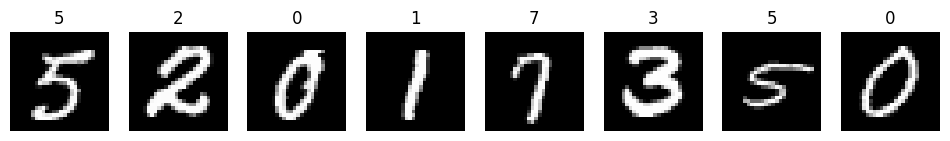

In [2]:
train_loader, val_loader, test_loader = preprocess_mnist(flatten=False)

images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(str(labels[i].item()))
    axes[i].axis('off')
plt.show()


## Displaying Flattened MNIST Data Information

In [3]:
train_loader, val_loader, test_loader = preprocess_mnist(batch_size=64, augment=False, flatten=True)

images, labels = next(iter(train_loader))
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels[:10]}")

Images batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])
Example labels: tensor([9, 6, 9, 0, 9, 9, 5, 8, 2, 8])


Epoch 1/20 | Train Loss: 1.1653 | Train Acc: 70.06% | Val Loss: 0.5207 | Val Acc: 85.46%
Epoch 2/20 | Train Loss: 0.4172 | Train Acc: 88.40% | Val Loss: 0.3656 | Val Acc: 89.69%
Epoch 3/20 | Train Loss: 0.3277 | Train Acc: 90.53% | Val Loss: 0.3203 | Val Acc: 90.85%
Epoch 4/20 | Train Loss: 0.2853 | Train Acc: 91.78% | Val Loss: 0.2823 | Val Acc: 91.81%
Epoch 5/20 | Train Loss: 0.2558 | Train Acc: 92.66% | Val Loss: 0.2601 | Val Acc: 92.44%
Epoch 6/20 | Train Loss: 0.2340 | Train Acc: 93.21% | Val Loss: 0.2389 | Val Acc: 92.98%
Epoch 7/20 | Train Loss: 0.2152 | Train Acc: 93.73% | Val Loss: 0.2336 | Val Acc: 93.13%
Epoch 8/20 | Train Loss: 0.1999 | Train Acc: 94.19% | Val Loss: 0.2166 | Val Acc: 93.61%
Epoch 9/20 | Train Loss: 0.1862 | Train Acc: 94.62% | Val Loss: 0.2027 | Val Acc: 94.03%
Epoch 10/20 | Train Loss: 0.1739 | Train Acc: 94.99% | Val Loss: 0.1925 | Val Acc: 94.28%
Epoch 11/20 | Train Loss: 0.1633 | Train Acc: 95.22% | Val Loss: 0.1792 | Val Acc: 94.67%
Epoch 12/20 | Train

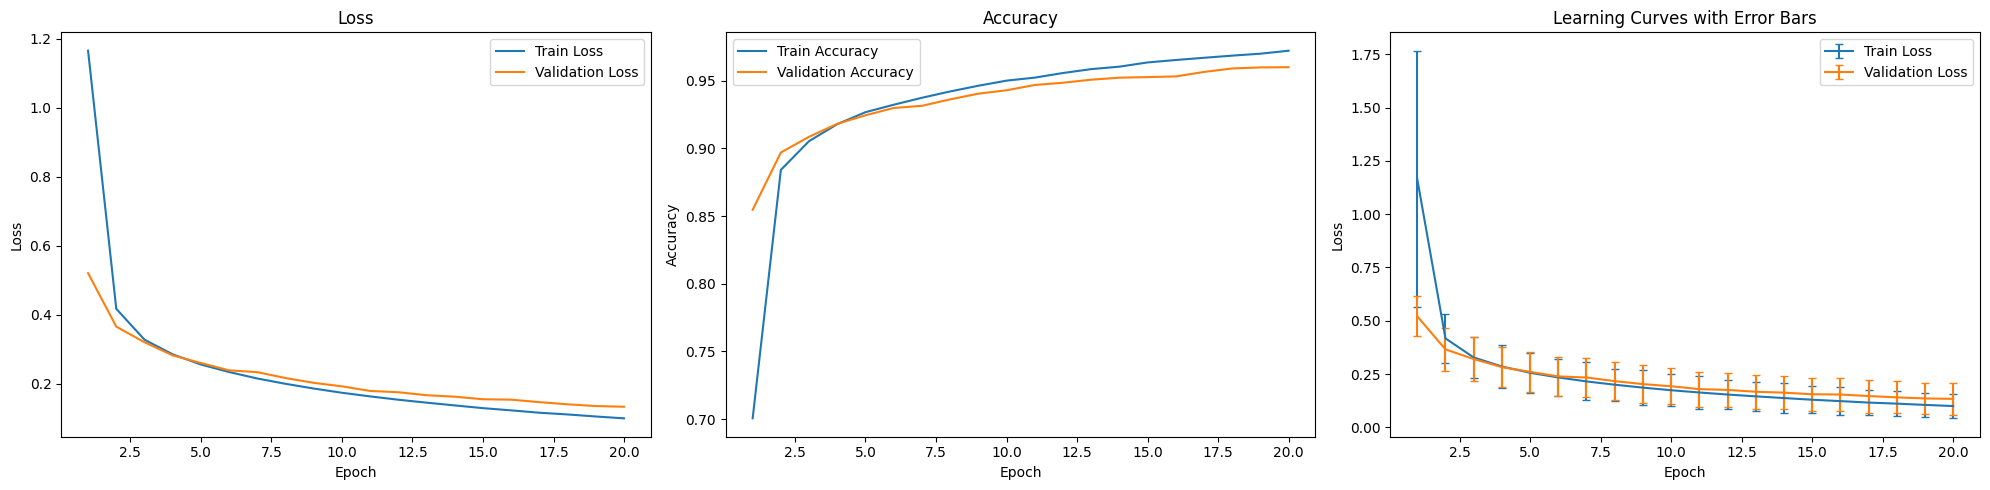

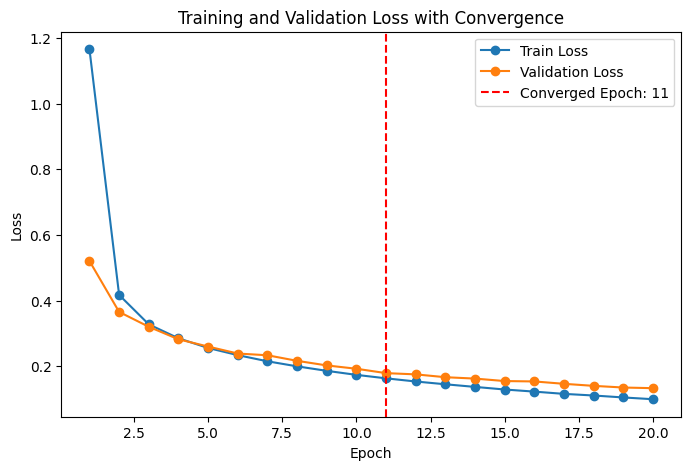

In [4]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model, loss, optimizer
model = NNModel().to(device)
model.apply(model._init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 20

# Train
history = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device)

# Plot
plot_training_curves(history, epochs=epochs)
conv_epoch = detect_convergence(history["val_loss_mean"])
plot_convergence(history["train_loss_mean"], history["val_loss_mean"], conv_epoch)


# Analysis


### 1. Learning Rate Analysis

Training with learning rate: 0.001
Epoch 1/10 | Train Loss: 2.2014 | Train Acc: 26.52% | Val Loss: 2.1042 | Val Acc: 39.00%
Epoch 2/10 | Train Loss: 1.9952 | Train Acc: 46.58% | Val Loss: 1.8788 | Val Acc: 52.67%
Epoch 3/10 | Train Loss: 1.7303 | Train Acc: 58.12% | Val Loss: 1.5793 | Val Acc: 62.12%
Epoch 4/10 | Train Loss: 1.4089 | Train Acc: 67.67% | Val Loss: 1.2552 | Val Acc: 72.37%
Epoch 5/10 | Train Loss: 1.1119 | Train Acc: 75.81% | Val Loss: 0.9985 | Val Acc: 77.96%
Epoch 6/10 | Train Loss: 0.8953 | Train Acc: 80.18% | Val Loss: 0.8204 | Val Acc: 81.42%
Epoch 7/10 | Train Loss: 0.7491 | Train Acc: 82.53% | Val Loss: 0.7035 | Val Acc: 83.17%
Epoch 8/10 | Train Loss: 0.6508 | Train Acc: 84.23% | Val Loss: 0.6237 | Val Acc: 84.59%
Epoch 9/10 | Train Loss: 0.5822 | Train Acc: 85.45% | Val Loss: 0.5655 | Val Acc: 85.61%
Epoch 10/10 | Train Loss: 0.5311 | Train Acc: 86.42% | Val Loss: 0.5223 | Val Acc: 86.69%


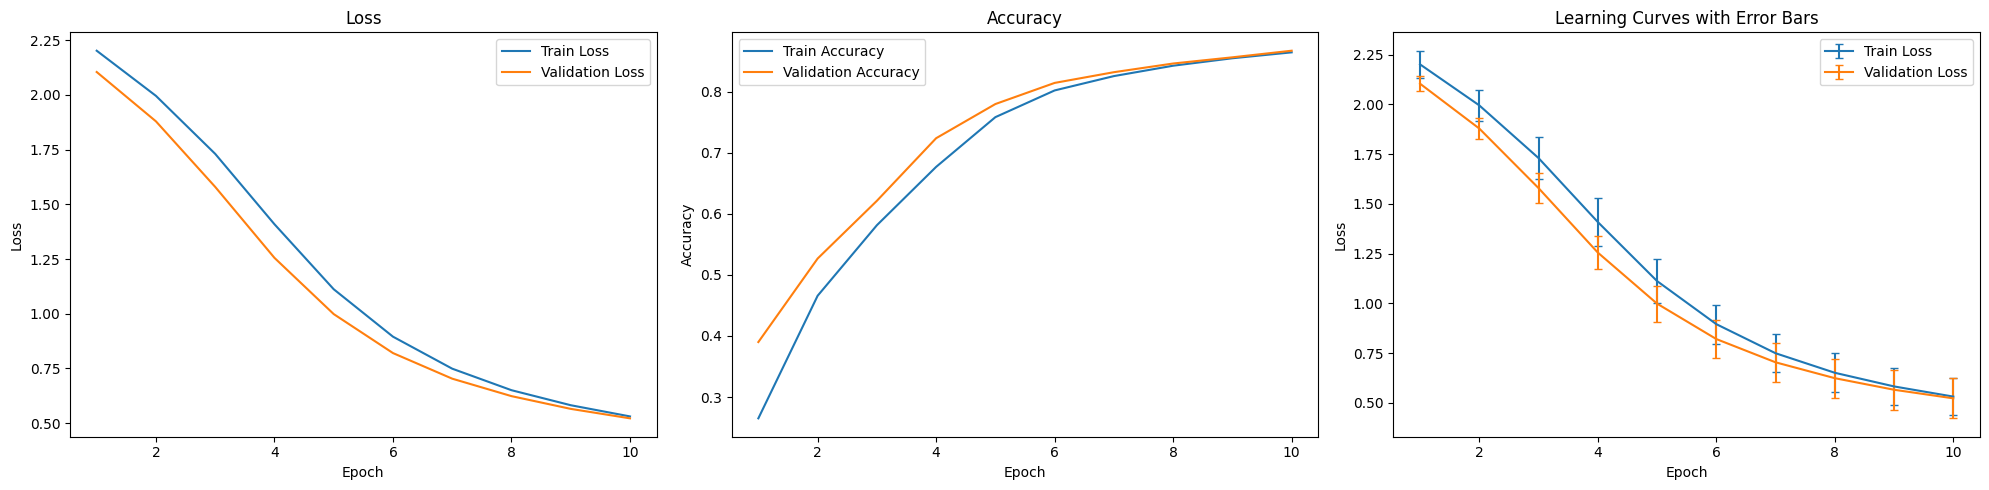

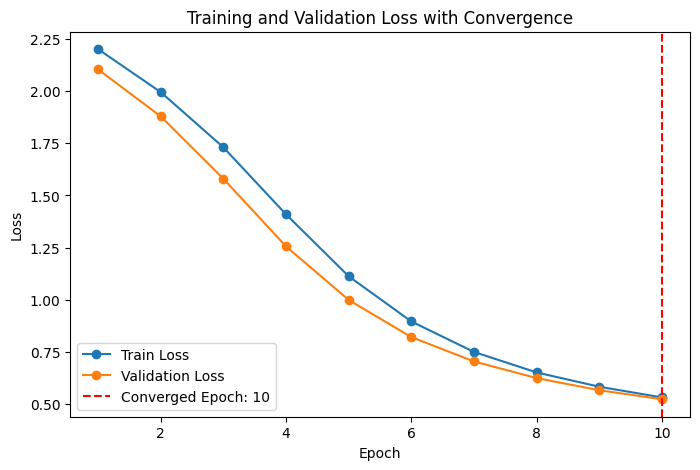

Training with learning rate: 0.01
Epoch 1/10 | Train Loss: 1.1978 | Train Acc: 68.00% | Val Loss: 0.5371 | Val Acc: 85.40%
Epoch 2/10 | Train Loss: 0.4173 | Train Acc: 88.44% | Val Loss: 0.3807 | Val Acc: 89.40%
Epoch 3/10 | Train Loss: 0.3265 | Train Acc: 90.53% | Val Loss: 0.3214 | Val Acc: 90.61%
Epoch 4/10 | Train Loss: 0.2847 | Train Acc: 91.80% | Val Loss: 0.2910 | Val Acc: 91.54%
Epoch 5/10 | Train Loss: 0.2557 | Train Acc: 92.67% | Val Loss: 0.2828 | Val Acc: 91.77%
Epoch 6/10 | Train Loss: 0.2319 | Train Acc: 93.27% | Val Loss: 0.2448 | Val Acc: 92.98%
Epoch 7/10 | Train Loss: 0.2114 | Train Acc: 93.84% | Val Loss: 0.2283 | Val Acc: 93.43%
Epoch 8/10 | Train Loss: 0.1957 | Train Acc: 94.42% | Val Loss: 0.2107 | Val Acc: 94.08%
Epoch 9/10 | Train Loss: 0.1811 | Train Acc: 94.82% | Val Loss: 0.1975 | Val Acc: 94.26%
Epoch 10/10 | Train Loss: 0.1687 | Train Acc: 95.12% | Val Loss: 0.1901 | Val Acc: 94.51%


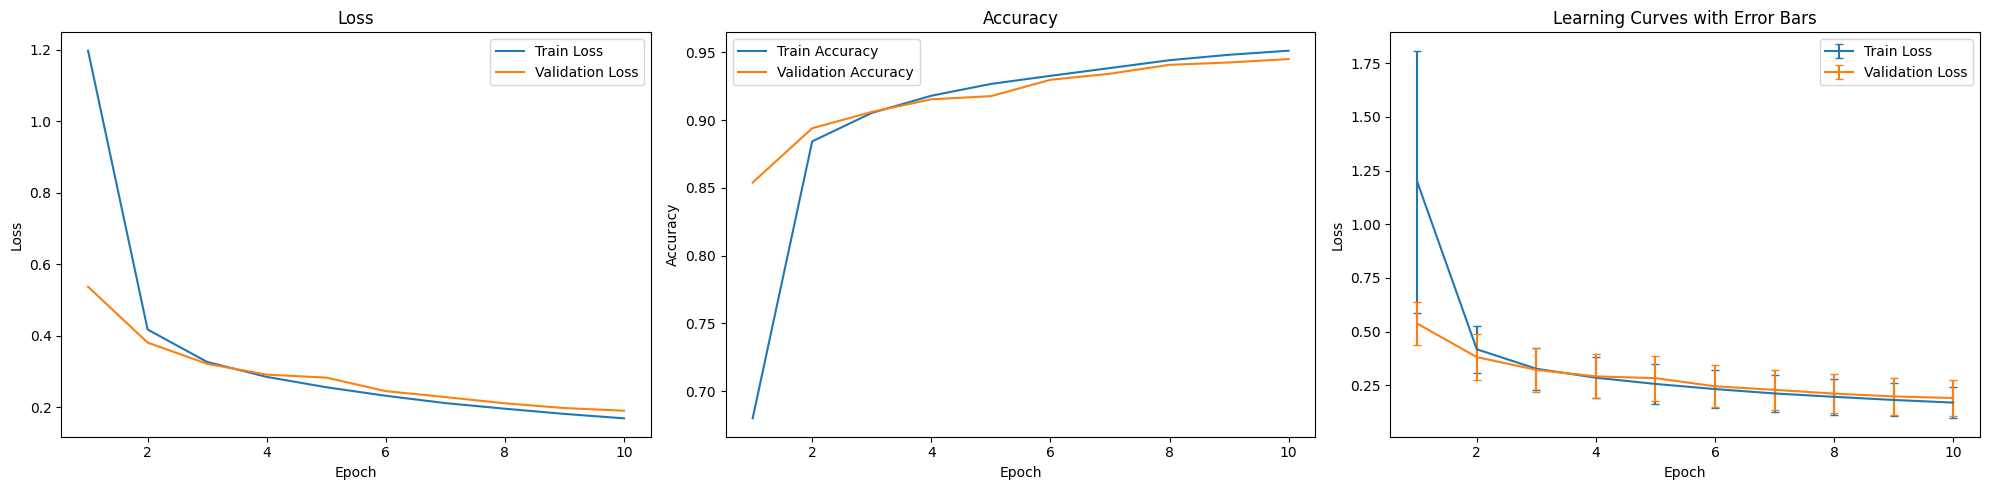

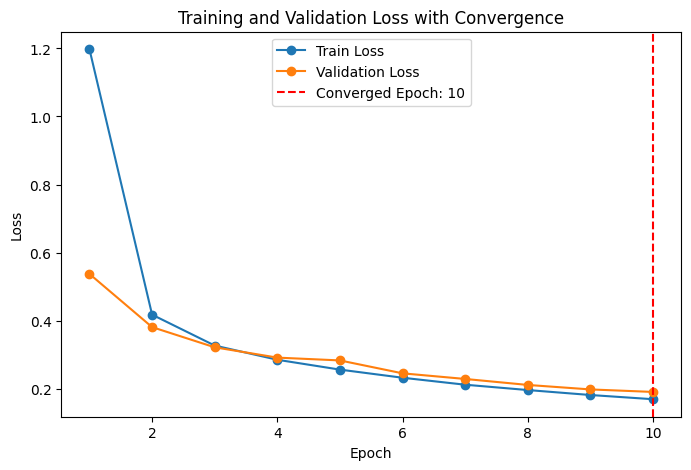

Training with learning rate: 0.1
Epoch 1/10 | Train Loss: 0.4196 | Train Acc: 87.33% | Val Loss: 0.1977 | Val Acc: 93.90%
Epoch 2/10 | Train Loss: 0.1642 | Train Acc: 95.03% | Val Loss: 0.2718 | Val Acc: 91.82%
Epoch 3/10 | Train Loss: 0.1116 | Train Acc: 96.62% | Val Loss: 0.1090 | Val Acc: 96.58%
Epoch 4/10 | Train Loss: 0.0815 | Train Acc: 97.57% | Val Loss: 0.0986 | Val Acc: 96.95%
Epoch 5/10 | Train Loss: 0.0626 | Train Acc: 98.12% | Val Loss: 0.1094 | Val Acc: 96.59%
Epoch 6/10 | Train Loss: 0.0479 | Train Acc: 98.55% | Val Loss: 0.0909 | Val Acc: 97.04%
Epoch 7/10 | Train Loss: 0.0373 | Train Acc: 98.98% | Val Loss: 0.0892 | Val Acc: 97.26%
Epoch 8/10 | Train Loss: 0.0274 | Train Acc: 99.26% | Val Loss: 0.0845 | Val Acc: 97.53%
Epoch 9/10 | Train Loss: 0.0205 | Train Acc: 99.47% | Val Loss: 0.0884 | Val Acc: 97.61%
Epoch 10/10 | Train Loss: 0.0160 | Train Acc: 99.58% | Val Loss: 0.1206 | Val Acc: 96.80%


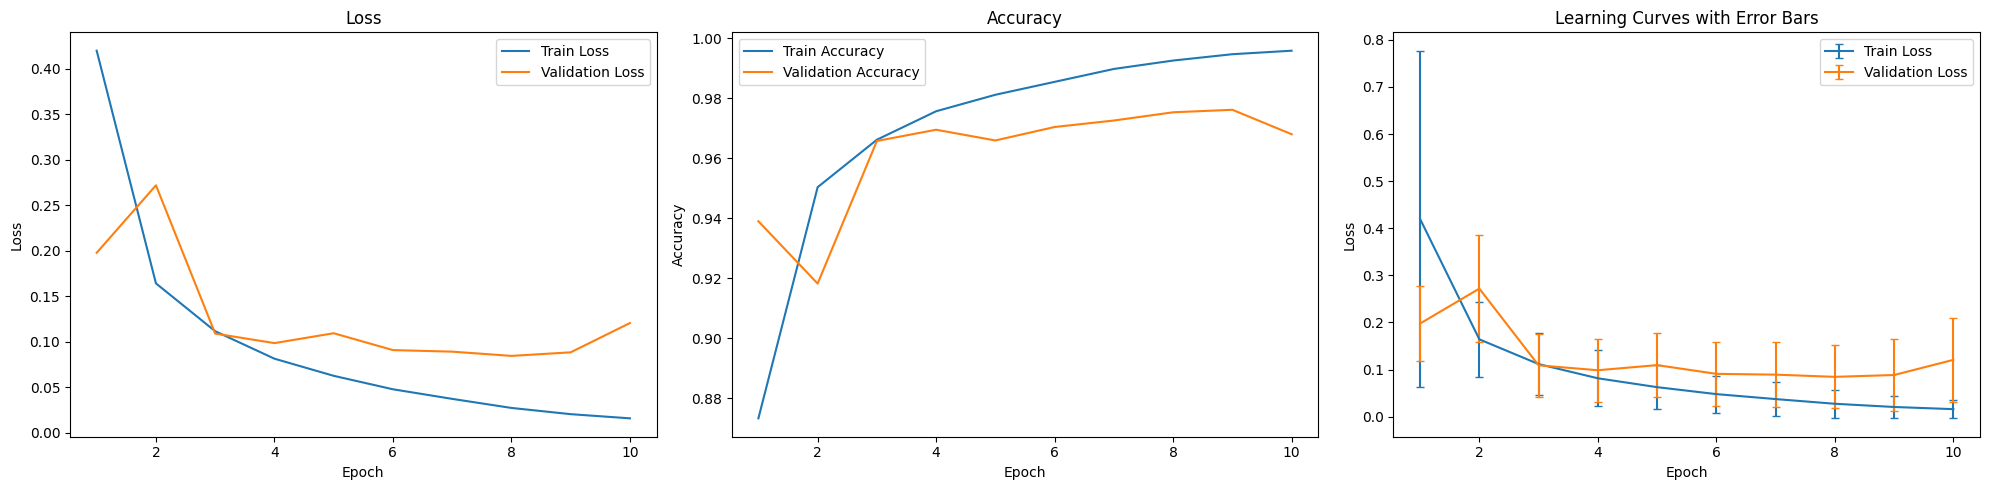

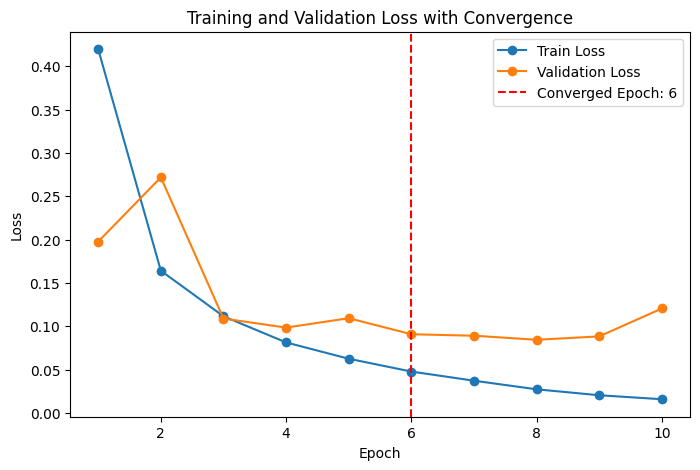

Training with learning rate: 1.0
Epoch 1/10 | Train Loss: nan | Train Acc: 10.91% | Val Loss: nan | Val Acc: 9.87%
Epoch 2/10 | Train Loss: nan | Train Acc: 9.87% | Val Loss: nan | Val Acc: 9.87%
Epoch 3/10 | Train Loss: nan | Train Acc: 9.86% | Val Loss: nan | Val Acc: 9.87%
Epoch 4/10 | Train Loss: nan | Train Acc: 9.87% | Val Loss: nan | Val Acc: 9.87%
Epoch 5/10 | Train Loss: nan | Train Acc: 9.87% | Val Loss: nan | Val Acc: 9.87%
Epoch 6/10 | Train Loss: nan | Train Acc: 9.88% | Val Loss: nan | Val Acc: 9.87%
Epoch 7/10 | Train Loss: nan | Train Acc: 9.86% | Val Loss: nan | Val Acc: 9.87%
Epoch 8/10 | Train Loss: nan | Train Acc: 9.87% | Val Loss: nan | Val Acc: 9.87%
Epoch 9/10 | Train Loss: nan | Train Acc: 9.87% | Val Loss: nan | Val Acc: 9.87%
Epoch 10/10 | Train Loss: nan | Train Acc: 9.88% | Val Loss: nan | Val Acc: 9.87%


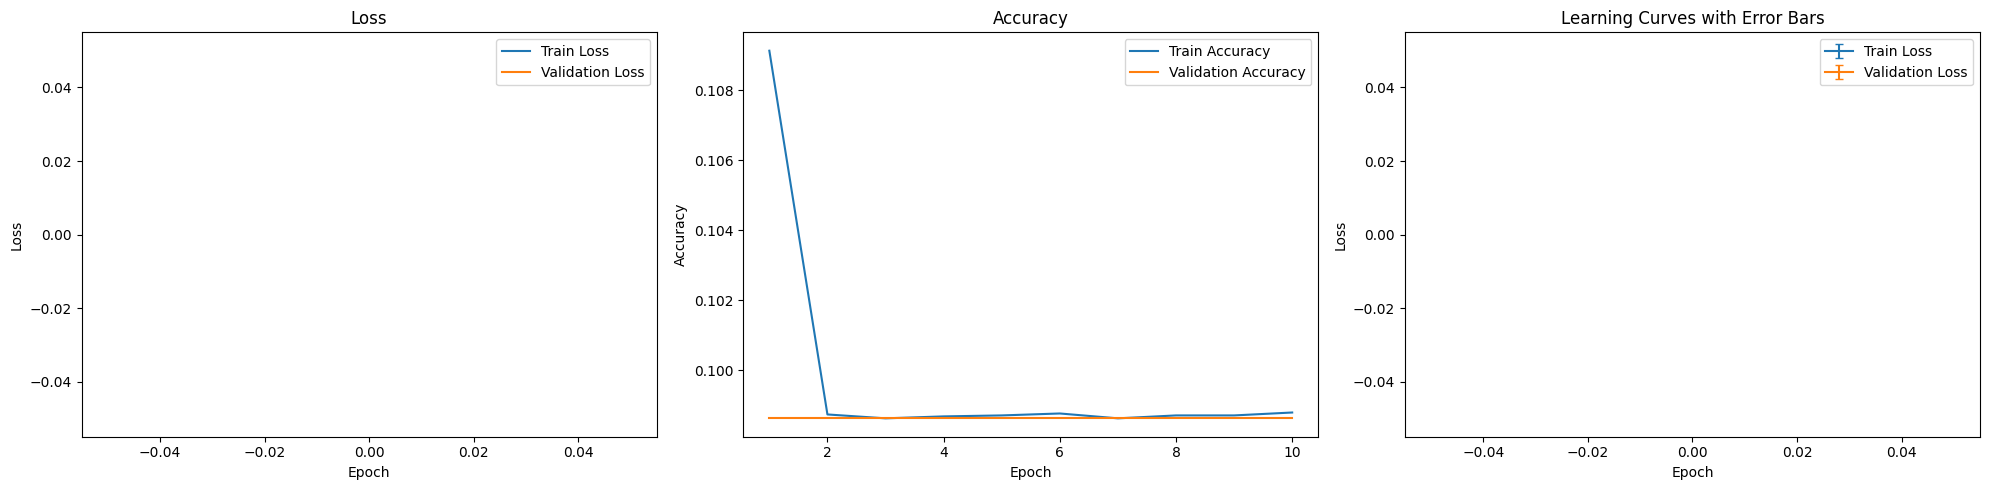

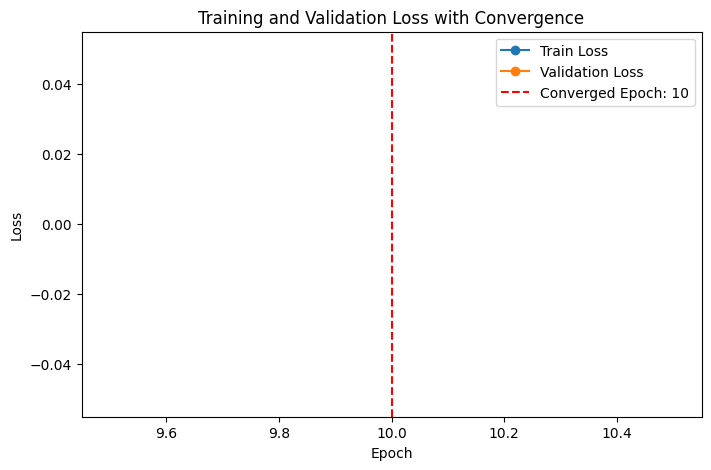

LR 0.001 → Final Val Acc: 86.69%
LR 0.01  → Final Val Acc: 94.51%
LR 0.1   → Final Val Acc: 96.80%
LR 1.0   → Final Val Acc: 9.87%

Best Learning Rate: 0.1 with Val Acc = 96.80%


In [5]:
# Test values : [0.001, 0.01, 0.1, 1.0]
learning_rates = [0.001, 0.01, 0.1, 1.0]
epochs = 10
results_lr = {}
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = NNModel().to(device)
    model.apply(model._init_weights)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    result = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device)
    results_lr[lr] = result
    plot_training_curves(result, epochs=epochs)
    conv_epoch = detect_convergence(result["val_loss_mean"])
    plot_convergence(result["train_loss_mean"], result["val_loss_mean"], conv_epoch)

# best lr 
best_lr = None
best_acc = 0.0

for lr, history in results_lr.items():
    val_acc = history["val_acc_mean"][-1]
    print(f"LR {lr:<5} → Final Val Acc: {val_acc*100:.2f}%")
    if val_acc > best_acc:
        best_acc = val_acc
        best_lr = lr

print(f"\nBest Learning Rate: {best_lr} with Val Acc = {best_acc*100:.2f}%")


### 2. Batch Size Analysis


In [6]:
# Test Values : [16, 32, 64, 128]
batch_sizes = [16, 32, 64, 128]
epochs = 10
results_bs = {} 

for bs in batch_sizes:  
    print(f"Training with batch size: {bs}")
    train_loader_bs, val_loader_bs, test_loader_bs = preprocess_mnist(batch_size=bs, augment=False, flatten=True)
   
    # model, loss, optimizer
    model = NNModel().to(device)
    model.apply(model._init_weights)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    
    result = train_model(model, train_loader_bs, val_loader_bs, criterion, optimizer, epochs=epochs, device=device)
    results_bs[bs] = result

 
# best batch size
best_bs = None
best_acc = 0.0  
for bs, history in results_bs.items():
    val_acc = history["val_acc_mean"][-1]
    print(f"BS {bs:<5} → Final Val Acc: {val_acc*100:.2f}%")
    if val_acc > best_acc:
        best_acc = val_acc
        best_bs = bs

print(f"\nBest Batch Size: {best_bs} with Val Acc = {best_acc*100:.2f}%")


Training with batch size: 16
Epoch 1/10 | Train Loss: 0.5833 | Train Acc: 83.41% | Val Loss: 0.2799 | Val Acc: 91.93%
Epoch 2/10 | Train Loss: 0.2423 | Train Acc: 92.86% | Val Loss: 0.2285 | Val Acc: 93.11%
Epoch 3/10 | Train Loss: 0.1813 | Train Acc: 94.79% | Val Loss: 0.1774 | Val Acc: 94.65%
Epoch 4/10 | Train Loss: 0.1452 | Train Acc: 95.71% | Val Loss: 0.1541 | Val Acc: 95.40%
Epoch 5/10 | Train Loss: 0.1188 | Train Acc: 96.61% | Val Loss: 0.1299 | Val Acc: 96.05%
Epoch 6/10 | Train Loss: 0.0989 | Train Acc: 97.12% | Val Loss: 0.1173 | Val Acc: 96.41%
Epoch 7/10 | Train Loss: 0.0830 | Train Acc: 97.61% | Val Loss: 0.1109 | Val Acc: 96.55%
Epoch 8/10 | Train Loss: 0.0714 | Train Acc: 97.94% | Val Loss: 0.1017 | Val Acc: 96.91%
Epoch 9/10 | Train Loss: 0.0616 | Train Acc: 98.19% | Val Loss: 0.1118 | Val Acc: 96.57%
Epoch 10/10 | Train Loss: 0.0525 | Train Acc: 98.48% | Val Loss: 0.0993 | Val Acc: 97.04%
Training with batch size: 32
Epoch 1/10 | Train Loss: 0.7887 | Train Acc: 78.10%

### 3. Architecture Analysis

In [7]:
layers = [2, 3, 4, 5]
neurons_per_layer = [64, 128, 256, 512]
epochs = 10
results_arch = {}

for num_layers in layers:
    for neurons in neurons_per_layer:
        print(f"Training with {num_layers} layers and {neurons} neurons per layer")

        model = NNModel(hidden_sizes=[neurons]*num_layers).to(device)
        model.apply(model._init_weights)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        
        result = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device)
        results_arch[(num_layers, neurons)] = result


Training with 2 layers and 64 neurons per layer
Epoch 1/10 | Train Loss: 1.1525 | Train Acc: 69.99% | Val Loss: 0.5827 | Val Acc: 85.01%
Epoch 2/10 | Train Loss: 0.4671 | Train Acc: 87.59% | Val Loss: 0.4192 | Val Acc: 88.20%
Epoch 3/10 | Train Loss: 0.3689 | Train Acc: 89.70% | Val Loss: 0.3576 | Val Acc: 90.16%
Epoch 4/10 | Train Loss: 0.3264 | Train Acc: 90.70% | Val Loss: 0.3275 | Val Acc: 90.78%
Epoch 5/10 | Train Loss: 0.3004 | Train Acc: 91.38% | Val Loss: 0.3073 | Val Acc: 91.19%
Epoch 6/10 | Train Loss: 0.2810 | Train Acc: 91.93% | Val Loss: 0.2891 | Val Acc: 91.76%
Epoch 7/10 | Train Loss: 0.2656 | Train Acc: 92.36% | Val Loss: 0.2795 | Val Acc: 92.17%
Epoch 8/10 | Train Loss: 0.2526 | Train Acc: 92.76% | Val Loss: 0.2657 | Val Acc: 92.55%
Epoch 9/10 | Train Loss: 0.2406 | Train Acc: 93.10% | Val Loss: 0.2544 | Val Acc: 92.70%
Epoch 10/10 | Train Loss: 0.2297 | Train Acc: 93.43% | Val Loss: 0.2448 | Val Acc: 93.01%
Training with 2 layers and 128 neurons per layer
Epoch 1/10 |